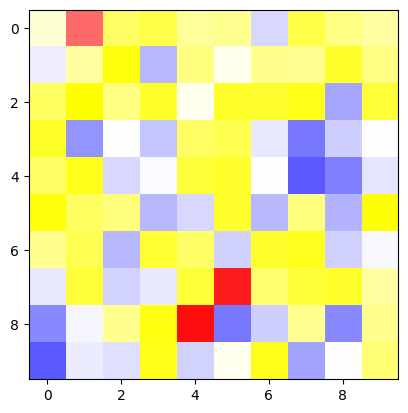

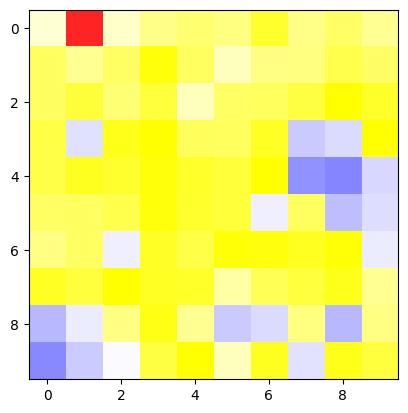

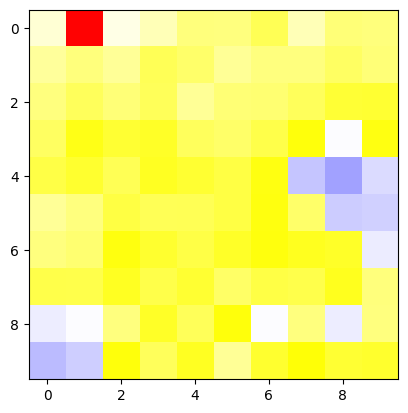

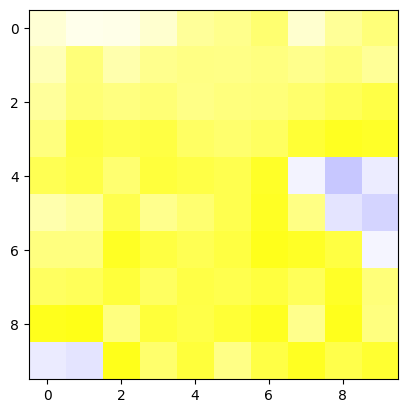

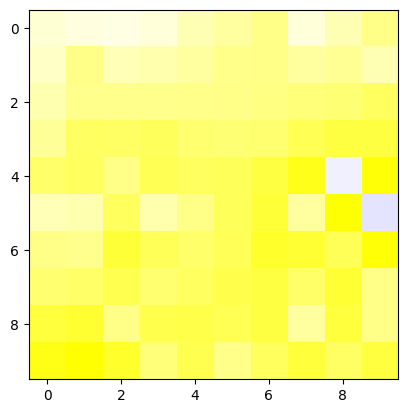

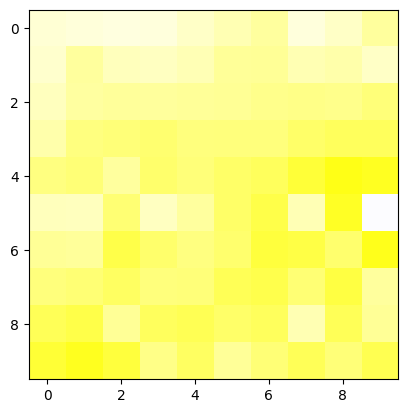

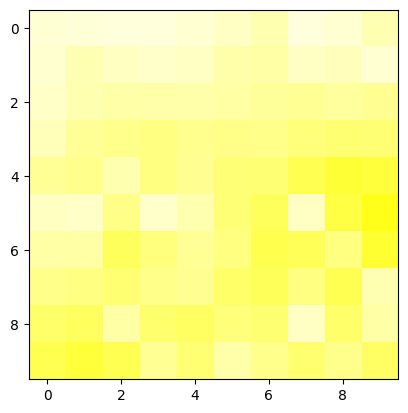

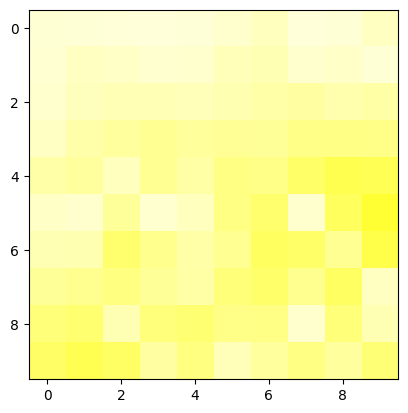

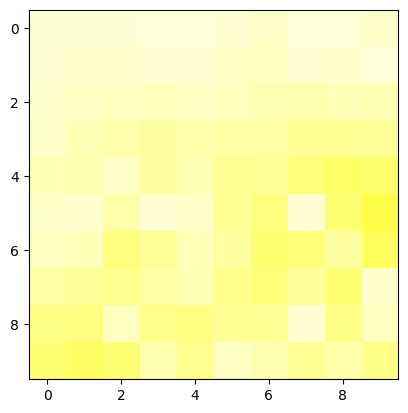

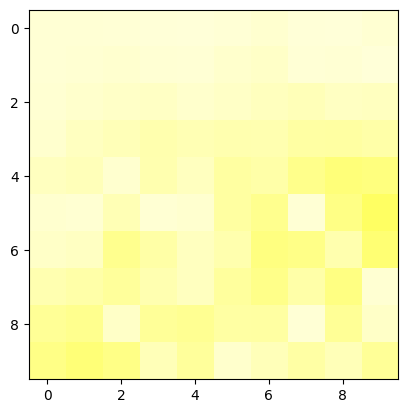

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# We define global variables
num_agents = 100
grid_size = 10
T0_percent_high_scores = 0.1

# Define agent class
class Agent:
    def __init__(self, score):
        self.score = score
        self.color = self.get_color()

    def get_color(self):
        if self.score >= 60:
            intensity = (self.score - 60) / 40  # range from 0 to 1
            return (1.0, intensity, intensity)  # red
        elif self.score >= 30:
            intensity = (self.score - 30) / 30  # range from 0 to 1
            return (1.0, 1.0, intensity)  # yellow
        else:
            intensity = self.score / 30  # range from 0 to 1
            return (intensity, intensity, 1.0)  # blue

# Initialize agents with scores
agents = []
for i in range(num_agents):
    if i < num_agents * T0_percent_high_scores:
        score = np.random.randint(60, 100)
    else:
        score = np.random.randint(0, 60)
    agents.append(Agent(score))

# Grid environment: Recall Stefania suggested to use 2D Grid
grid = np.zeros((grid_size, grid_size), dtype=object)
for i in range(grid_size):
    for j in range(grid_size):
        index = np.random.randint(num_agents)
        grid[i, j] = agents[index]

# Update scores, colors, and simulate agent interactions
for t in range(10):
    # Compute average score for each agent's neighborhood
    for agent in agents:
        locations = np.argwhere(grid == agent)
        if locations.size == 0:
            continue
        row, col = locations[0]
        neighbors = grid[max(0, row-1):min(grid_size, row+1), max(0, col-1):min(grid_size, col+1)].flatten()
        neighbor_scores = [n.score for n in neighbors if n != agent]
        if neighbor_scores:
            neighbor_avg_score = sum(neighbor_scores) / len(neighbor_scores)
            agent.score = (agent.score + neighbor_avg_score) / 2.0
            agent.color = agent.get_color()
    
    # Update grid with updated agents
    for agent in agents:
        locations = np.argwhere(grid == agent)
        if locations.size == 0:
            continue
        row, col = locations[0]
        grid[row, col] = agent
        
    # Create visualization of current state of the grid with colors
    plt.imshow([[agent.color for agent in row] for row in grid], interpolation='nearest')
    plt.show()


# New Section